## Primer: statistika temperatur v Stockholmu

## Example: temperature statistics in Stockholm

Knjižnico `numpy` uporabimo na primeru podatkov dnevne temperature v Stockholmu. Podatki obsegajo meritve za vsak dan med leti 1800 in 2011. Shranjeni so v datoteki, kjer vrstice predstavljajo meritve. Posamezni podatki - leto, mesec, dan in izmerjena temperatura - so ločeni z vejico.

We will use the `numpy` library on the case of daytime temperature data in Stockholm. Data includes metrics for each day between 1800 and 2011. They are stored in a file where the lines represent measurements. Individual data - year, month, day and measured temperature - are separated by comma.

In [1]:
from csv import DictReader

fp = open('podatki/stockholm.csv', 'rt')
reader = DictReader(fp)

for row in reader:
    print(row)
    break  # izpisi samo prvo vrstico

OrderedDict([('Year', '1800'), ('Month', '1'), ('Day', '1'), ('Temp', '-6.1')])


Predstavitev podatkov v obliki slovarja je koristna zaradi svoje jasnosti, vendar bo računanje bistveno hitrejše,
če podatke naložimo kot polje.

Presenting data in the form of a dictionary is useful for its clarity, but the calculation will be much faster,
if we load the data as an array.

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

data = np.loadtxt('podatki/stockholm.csv', delimiter=",", skiprows=1)
data

array([[ 1800. ,     1. ,     1. ,    -6.1],
       [ 1800. ,     1. ,     2. ,   -15.4],
       [ 1800. ,     1. ,     3. ,   -15. ],
       ..., 
       [ 2011. ,    12. ,    29. ,     4.9],
       [ 2011. ,    12. ,    30. ,     0.6],
       [ 2011. ,    12. ,    31. ,    -2.6]])

Preverimo velikost podatkov: število vrstic (_meritve_, _vzorci_) in število stolpcev (_atributov_).

Check the data size: the number of lines (_measurements_, _samples_) and the number of columns (_attributes_).

In [3]:
data.shape

(77431, 4)

Stolpci hranijo podatke v tem vrstnem redu: `leto`, `mesec`, `dan` in `temperatura`. 

Poglejmo si vse meritve, ki so bile narejene v letu 2011. Ustvarimo binarni vektor `data[:, 0] == 2011`, ki vsebuje vrednost `True` nas ustreznih mestih ter ga uporabimo za naslavljanje podatkov.

Columns store data in this order: `year`, `month`, `day` and `temperature`.

Let's take a look at all the measurements made in 2011. We create the binary vector `data [:, 0] == 2011`, which contains the `True` value on the relevant positions and is used to address the data.

In [4]:
data[data[:, 0] == 2011]

array([[ 2011. ,     1. ,     1. ,    -2.3],
       [ 2011. ,     1. ,     2. ,    -3.6],
       [ 2011. ,     1. ,     3. ,    -6.9],
       ..., 
       [ 2011. ,    12. ,    29. ,     4.9],
       [ 2011. ,    12. ,    30. ,     0.6],
       [ 2011. ,    12. ,    31. ,    -2.6]])

##### Vprašanje 1-2-1

Izpišite temperaturo pred 200 leti, na primer, temperaturo dne 5. decembra 1817.

##### Question 1-2-1

Print out the temperature 200 years ago, for example, the temperature on December 5, 1817.

[Odgovor](201-2.ipynb#Odgovor-1-2-1)

[Answer](201-2.ipynb#Answer-1-2-1)

### Procesiranje podatkov

Na tej točki nastopijo operacije, ki nam povedo nekaj o podatkih. Izračunali bomo nekaj osnovnih statistik.

### Data Processing

Let's introduce operations that tell us something about the data. We will calculate some basic statistics.

#### Povprečje, aritmetična sredina

#### Average, arithmetic mean

Dnevna temperatura je v stolpcu z indeksom 3 (četrti stolpec). Izračunamo povprečje vseh meritev.

Daily temperature is in column with index 3 (fourth column). Calculate the average of all measurements.

In [5]:
np.mean(data[:, 3])

6.1971096847515854

Ugotovimo, da je bila povprečna dnevna temperatura v Stockholmu v preteklih 200 letih prijetnih 6.2 C. 

We find that the average daily temperature in Stockholm over the past 200 years was pleasant 6.2 C.

##### Vprašanje 1-2-2

Kakšna je povprečna temperatura januarja (mesec s številko `1`)?

##### Question 1-2-2

What is the average temperature in January (month with the number '1')?

[Odgovor](201-2.ipynb#Odgovor-1-2-2)

[Answer](201-2.ipynb#Answer-1-2-2)

#### Standardni odklon in varianca

#### Standard deviation and variance

In [6]:
np.std(data[:,3]), np.var(data[:,3])

(8.2822716213405734, 68.596023209663414)

##### Vprašanje 1-2-3

V katerem mesecu je odklon temperature največji? 

##### Question 1-2-3

In what month is the temperature deviation the biggest?

In [7]:
# Poišči mesec z največjim odklonom oz. varianco v temperaturi.
# Namig: zgradi seznam terk oblike (odklon v temperaturi, mesec)
# ...

[Odgovor](201-2.ipynb#Odgovor-1-2-3)

[Answer](201-2.ipynb#Answer-1-2-3)

#### Najmanjša in največja vrednost

#### Minimum and maximum value

Poiščimo najnižjo dnevno temperaturo:

Let's find the lowest daily temperature:

In [8]:
data[:,3].min()

-25.800000000000001

Poiščimo najvišjo dnevno temperaturo:

Let's find the highest daily temperature:

In [9]:
data[:,3].max()

28.300000000000001

##### Vprašanje 1-2-4

Pošči mesec in leto, ko so zabeležili največjo temperaturo.

##### Question 1-2-4

The month and year when the maximum temperature was recorded.

In [10]:
# Poišči mesec in leto, kjer smo v povprečju beležili najvišjo temperaturo.
# Namig: zgradi seznam terk oblike (povprecna temperatura, (leto, mesec))
# ...

[Odgovor](201-2.ipynb#Odgovor-1-2-4)

[Answer](201-2.ipynb#Answer-1-2-4)

#### Vsota, produkt

#### Sum, product

Temperatur ponavadi ne seštevamo. Pa vendar, izkoristimo priložnost za prikaz funkcij vsote in produkta.

Temperature is usually not summed up. Nevertheless, take the opportunity to see the functions of the sum and the product.

In [11]:
data[:, 3].sum()  # vsota vseh temperatur

479848.40000000002

In [12]:
data[:, 3].sum() / data.shape[0]   # dobimo ravno aritmetično sredino

6.1971096847515854

In [13]:
# prva vrstica v podatkih ...
data[0, :]

array([ 1800. ,     1. ,     1. ,    -6.1])

In [14]:
# ... in njen produkt
np.prod(data[0, :])

-10980.0

### Globalno segrevanje?

Odgovorimo na še nekaj vprašanj. Po Stockholmu krožijo govorice, da se temperatura iz leta v leto povečuje.

### Global warming?

Let's answer a few more questions. According to Stockholm, the rumors circulate that the temperature is increasing from year to year.

In [15]:
# Izračunajmo povprečno temperaturo za vsako leto posebej 
letna_povprečja = dict()

for leto in range(1800, 2012):
    # Uporabimo pogojno naslavljanje polja
    letna_povprečja[leto] = data[data[:, 0] == leto, 3].mean()

##### Vprašanje 1-2-5

Izpiši leta, ko je povprečna temperatura višja od prejšnjega leta.

##### Question 1-2-5

Write years when the average temperature is higher than last year.

In [16]:
# Izpiši vsako leto, ki ima večjo povprečno temperaturo od prejšnjega
# 

Poišči 10 najtoplejših let.

Find the 10 warmest years.

In [17]:
# Poišči 10 najtoplejših let
# 

[Odgovor](201-2.ipynb#Odgovor-1-2-5)

[Answer](201-2.ipynb#Answer-1-2-5)

Zadnja leta so res sumljivo topla. Poskusimo prikazati podatke z uporabo knjižnice `matplotlib`.

The last years are really suspiciously warm. Try to display data using the matplotlib library.

In [18]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

Naredimo novo sliko (*figure*) in nanjo narišemo povprečne temperature v odvisnosti od časa. 

Let's make a new image (*figure*) and plot the average temperatures against time.

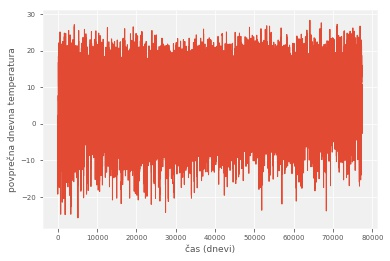

In [19]:
plt.figure()
plt.plot(data[:, 3])
plt.xlabel("čas (dnevi)")  # Vedno označimo osi.
plt.ylabel("povprečna dnevna temperatura");

Precej nepregledno. Poizkusite razširiti sliko tako da spremenite `plt.figure(figsize=(sirina, visina))`, kjer sta `visina` in `sirina` podani v palcih oz. inčah (privzeto `(5, 3)`) .

Vseeno pa opazimo, da se pogostost dni s temperaturo nižjo od -20.0 C zmanjšuje. Poglejmo.

Quite opaque. Try expanding the image by changing `plt.figure (figsize = (width, height))`, where `height 'and` width' are given in inches or inch (default `(5, 3)`).

However, we observe that the frequency of days with a temperature lower than -20.0 C is decreasing. Let's see.

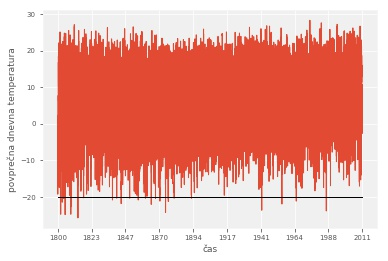

In [20]:
plt.figure()

# Narišimo izvirne podatke
plt.plot(data[:, 3])

# Z vodoravno črto označimo -20.0 C.
plt.plot([0, len(data)], [-20, -20], color="black")   

# Spremenimo še oznako x-osi. Dodajmo 10 enako oddaljenih kazalcev.
ticks = np.arange(0, len(data), len(data)//9, dtype=int)
plt.xticks(ticks)
plt.gca().set_xticklabels(data[ticks, 0].astype(int))

# Vedno označimo osi.
plt.xlabel("čas")  
plt.ylabel("povprečna dnevna temperatura")
plt.show()

Od 80-tih let prejšnjega stoletja res nismo imeli kakšnega posebej hladnega dneva. Vseeno pa bi želeli še bolj poenostaviti prikaz. Prikažimo vsako leto z eno točko, ki naj prikazuje povprečno temperaturo leta.

From the 80s of the last century, we really did not have any particular cold days. However, we would like to further simplify the display. Let's show each year with one point, which should show the average temperature of the year.

##### Vprašanje 1-2-6

Nariši sliko povprečne letne temperature. Uporabi funkcijo `plt.plot(x, y)`  kjer je `x` vektor let, `y` pa vektor pripadajočih povprečnih temperatur. Ali misliš, da se temperatura z leti res povečuje?

##### Question 1-2-6

Draw a picture of the average annual temperature. Use the `plt.plot (x, y)` function where `x` is the vector of years, and` y` is the vector of the corresponding average temperatures. Do you think the temperature really grows over the years?

In [21]:
# Pomagaj si s letna_povprečja.
# Os x: leto
# Os y: povprečna letna temperatura
# ...

[Odgovor](201-2.ipynb#Odgovor-1-2-6)

[Answer](201-2.ipynb#Answer-1-2-6)